In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.offline as iplot
import cufflinks as cf
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
df1 = pd.read_csv(r'C:\Users\sshar127\Desktop\Python\Calories Burned Prediction\calories.csv')
df2 = pd.read_csv(r'C:\Users\sshar127\Desktop\Python\Calories Burned Prediction\exercise.csv')

In [4]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df3 = df1.merge(df2, how='inner', on = 'User_ID')
df3.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df3.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [8]:
df3.drop('User_ID', axis = 1, inplace = True)

In [9]:
df3.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

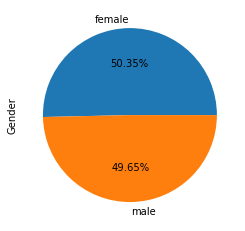

In [10]:
df3.Gender.value_counts().plot.pie(autopct = '%.2f%%')

In [11]:
grp1 = df3.groupby('Gender')

In [12]:
grp1.get_group('male').max()

Calories       314
Gender        male
Age             79
Height         222
Weight         132
Duration        30
Heart_Rate     128
Body_Temp     41.5
dtype: object

In [13]:
grp1.get_group('female').max()

Calories         240
Gender        female
Age               79
Height           205
Weight           101
Duration          30
Heart_Rate       122
Body_Temp       41.5
dtype: object

In [14]:
for n, m in grp1:
    print (n)
    print (m)

female
       Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1          66.0  female   20   166.0    60.0      14.0        94.0       40.3
3          71.0  female   34   179.0    71.0      13.0       100.0       40.5
4          35.0  female   27   154.0    58.0      10.0        81.0       39.8
5         123.0  female   36   151.0    50.0      23.0        96.0       40.7
6         112.0  female   33   158.0    56.0      22.0        95.0       40.5
...         ...     ...  ...     ...     ...       ...         ...        ...
14990      89.0  female   22   190.0    79.0      19.0        96.0       40.3
14994      52.0  female   48   159.0    57.0      10.0        94.0       39.8
14995      45.0  female   20   193.0    86.0      11.0        92.0       40.4
14996      23.0  female   27   165.0    65.0       6.0        85.0       39.2
14997      75.0  female   43   159.0    58.0      16.0        90.0       40.1

[7553 rows x 8 columns]
male
       Calories Gender  Age

In [15]:
df = pd.get_dummies(df3, columns = ['Gender'], drop_first = True)
df.head()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,231.0,68,190.0,94.0,29.0,105.0,40.8,1
1,66.0,20,166.0,60.0,14.0,94.0,40.3,0
2,26.0,69,179.0,79.0,5.0,88.0,38.7,1
3,71.0,34,179.0,71.0,13.0,100.0,40.5,0
4,35.0,27,154.0,58.0,10.0,81.0,39.8,0


In [16]:
corr_mat = df.corr()

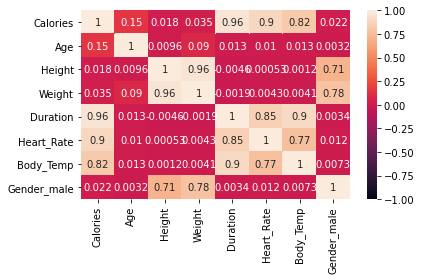

In [17]:
sns.heatmap(corr_mat, annot = True, vmin = -1, vmax = 1)
plt.tight_layout()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Calories     15000 non-null  float64
 1   Age          15000 non-null  int64  
 2   Height       15000 non-null  float64
 3   Weight       15000 non-null  float64
 4   Duration     15000 non-null  float64
 5   Heart_Rate   15000 non-null  float64
 6   Body_Temp    15000 non-null  float64
 7   Gender_male  15000 non-null  uint8  
dtypes: float64(6), int64(1), uint8(1)
memory usage: 952.1 KB


In [19]:
df.Calories.max()

314.0

In [20]:
df.reset_index()

,index,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,0,231.0,68,190.0,94.0,29.0,105.0,40.8,1
1,1,66.0,20,166.0,60.0,14.0,94.0,40.3,0
2,2,26.0,69,179.0,79.0,5.0,88.0,38.7,1
3,3,71.0,34,179.0,71.0,13.0,100.0,40.5,0
4,4,35.0,27,154.0,58.0,10.0,81.0,39.8,0
...,...,...,...,...,...,...,...,...,...
14995,14995,45.0,20,193.0,86.0,11.0,92.0,40.4,0
14996,14996,23.0,27,165.0,65.0,6.0,85.0,39.2,0
14997,14997,75.0,43,159.0,58.0,16.0,90.0,40.1,0
14998,14998,11.0,78,193.0,97.0,2.0,84.0,38.3,1


In [26]:
x = df.loc[:,['Duration']]
y = df.loc[:, ['Calories']]

In [36]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115670436803502

In [48]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1.09551399 -1.11343606]
 [ 1.31522692  0.75991587]
 [ 1.5448213   1.92875938]
 ...
 [-0.1771365  -0.26482365]
 [-0.52152806 -0.47297386]
 [ 1.20042974  1.24026252]]


In [53]:
lr.predict(scx.transform([[15.5]]))

array([[-0.00494072]])

In [54]:
scy.inverse_transform(lr.predict(scx.transform([[15.5]])))

array([[89.23096126]])